In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'data/196_misaligned_features/'
file_name = 'dataset.tar.gz'
index = ['n', 'test_id', 'ind', 'feat']
data = pd.read_csv(file_path + file_name, sep='\t', names=index)

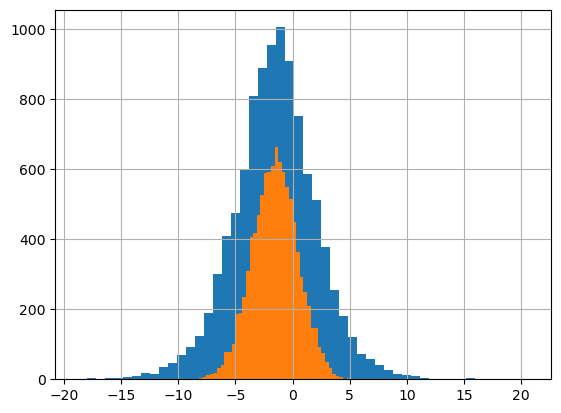

In [15]:
tdf = data[data['ind'] == 1423]
tdf[tdf['test_id'] == 2]['feat'].hist(bins=50)
tdf[tdf['test_id'] == 1]['feat'].hist(bins=50);

In [21]:
control_group = data[data['test_id'] == 1]
test_group = data[data['test_id'] == 2]

feature_pvalues = []
for feature in range(1500):
    control_feat = control_group[control_group['ind'] == feature]['feat']
    test_feat = test_group[test_group['ind'] == feature]['feat']
    if len(control_feat) > 0 and len(test_feat) > 0:
        ks_stat, p_value = ks_2samp(control_feat, test_feat)
        feature_pvalues.append((feature, p_value))

feature_pvalues.sort(key=lambda x: x[1])
top_10_features = [feature for feature, p_value in feature_pvalues[:10]]
print(','.join(map(str, sorted(top_10_features))))

493,677,709,814,940,988,1076,1289,1401,1423
